# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound

In [2]:
%%time
data = get_date_list(data)
data = run_engine(data)

100%|███████████████████████████████| 224548/224548 [00:17<00:00, 12778.80it/s]

pls   -0.00438
dtype: float64
--------------------------------------
            start_date ord_types               close_type      pls
32 2021-01-08 13:37:43     short              force_close -0.00202
33 2021-01-08 13:44:03      long                all_close  0.00118
34 2021-01-08 13:54:55     short                all_close -0.00223
35 2021-01-08 14:03:01      long                all_close  0.00105
36 2021-01-08 14:28:27      long                all_close -0.00406
37 2021-01-08 14:39:51     short                all_close  0.00302
38 2021-01-08 14:53:17     short                all_close  0.00104
39 2021-01-08 15:27:40     short              force_close -0.00158
40 2021-01-08 15:50:53      long              force_close  0.00054
41 2021-01-08 16:04:32      long              force_close -0.00202
42 2021-01-08 16:19:36      long              force_close -0.00197
43 2021-01-08 16:23:26     short              force_close  0.00094
44 2021-01-08 16:37:04      long              force_close -0

In [3]:
data['temp_df']['open_order'] = data['open_order_temp_list']
data['temp_df']['pl'] = data['pl_temp_list'] 
data['temp_df'].to_csv('data/temp.csv')

In [4]:
min(data['temp_df']['pl'])

-0.00308

In [5]:
max(data['temp_df']['pl'])

0.0041

In [6]:
max(data['temp_df']['open_order'])

3

In [7]:
data['dt_val']

datetime.datetime(2021, 1, 8, 21, 59, 56)

In [8]:
data['orders_list']

{'total_pl': 0,
 'pl_list': [],
 1: {'open_order_type': 'long', 'ask': 1.22192, 'pl': 0.0002}}

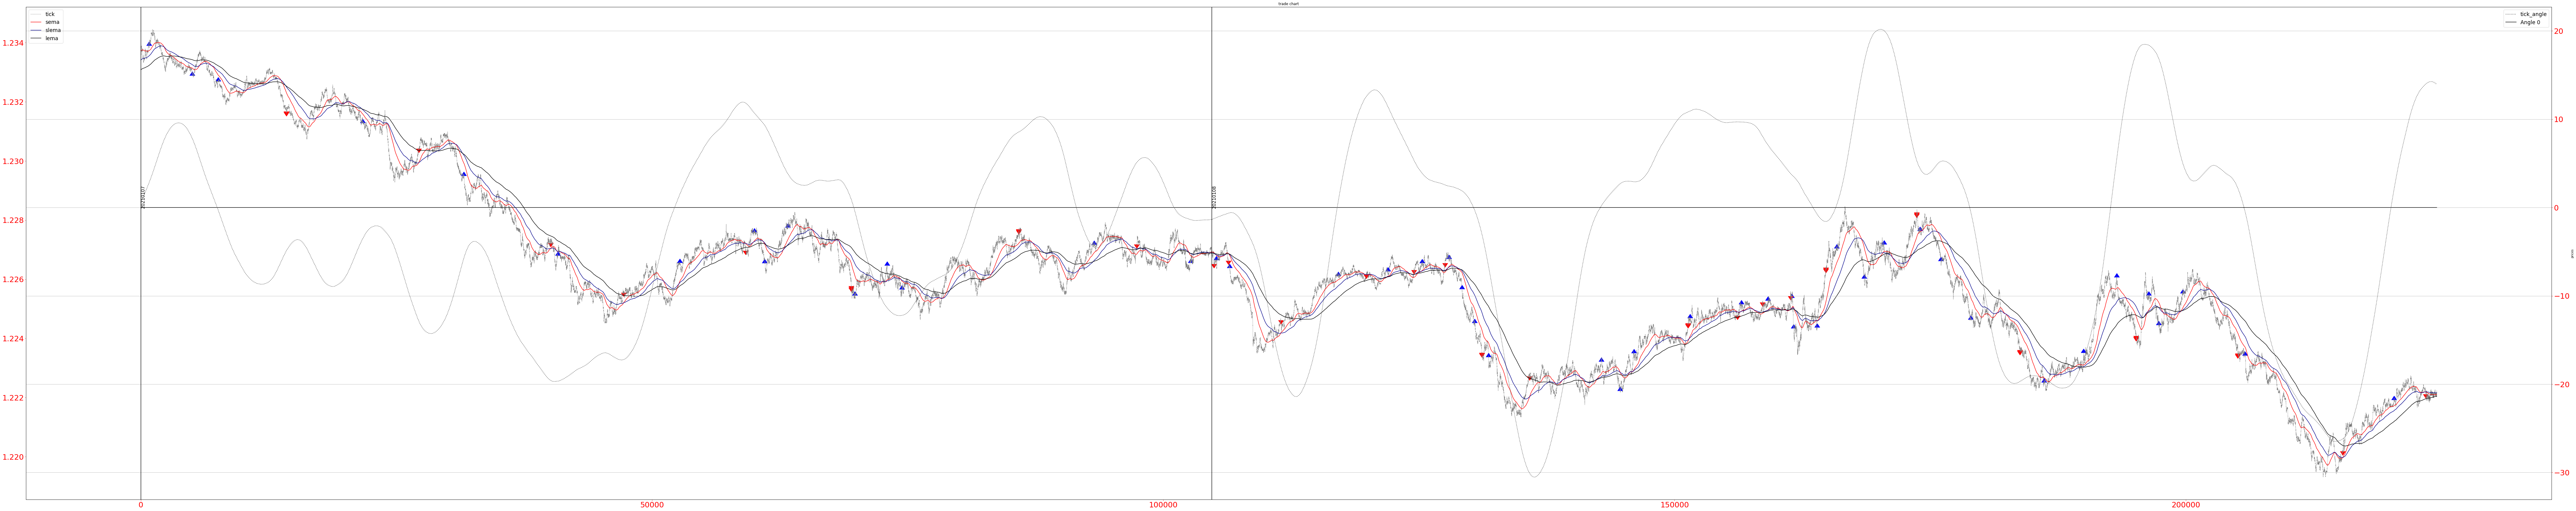

-----------------------------------------------------
Total PL : -0.004380000000000001
-------------
net_pl            : -0.00438/0.06332
-------------
+ve               : num= 32    sum= +0.02947    avg= +0.00092
-ve               : num= 15    sum= -0.03385    avg= -0.00226
-----------------------------------------------------
month_val
1   -0.00438
Name: pls, dtype: float64
-----------------------------------------------------
simple_slema_move_close    17
force_close                15
all_close                  15
Name: close_type, dtype: int64
-----------------------------------------------------


In [9]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['month_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['close_type'].value_counts())
print('-----------------------------------------------------')
winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)

In [10]:
data['report_df'].groupby(['date_val'])['pls'].sum()

date_val
7   -0.00135
8   -0.00303
Name: pls, dtype: float64

In [11]:
winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)
send_telegram_message(f'Run Complete : {data["df_name"]}')

In [12]:
data['report_df'].groupby(['close_type'])['pls'].count()

close_type
all_close                  15
force_close                15
simple_slema_move_close    17
Name: pls, dtype: int64

In [13]:
data['report_df'].groupby(['close_type'])['pls'].mean()

close_type
all_close                 -1.445603e-20
force_close               -1.024667e-03
simple_slema_move_close    6.464706e-04
Name: pls, dtype: float64

In [14]:
data['report_df'].groupby(['close_type'])['pls'].sum()

close_type
all_close                 -2.168404e-19
force_close               -1.537000e-02
simple_slema_move_close    1.099000e-02
Name: pls, dtype: float64

In [15]:
data['report_df'].groupby(['close_type'])['pls'].count()

close_type
all_close                  15
force_close                15
simple_slema_move_close    17
Name: pls, dtype: int64

In [16]:
x = np.round(data['report_df'].groupby(['month_val', 'date_val'])['pls'].sum().values.mean(),4)
print(f'Average pips per day : {x}')

Average pips per day : -0.0022


In [17]:
x = data['report_df'].groupby(['month_val', 'date_val'])['pls'].count().values.mean()
print(f'Average orders per day : {x}')

Average orders per day : 23.5


In [18]:
data['report_df'].groupby(['date'])['date'].count().value_counts().sort_values(ascending=False)

1    17
3    10
Name: date, dtype: int64

In [19]:
data['report_df']['duration'].sort_values(ascending=False)

0    0 days 05:03:49
1    0 days 03:44:30
2    0 days 03:01:07
24   0 days 01:49:37
10   0 days 01:48:57
45   0 days 01:31:27
11   0 days 01:31:16
25   0 days 01:30:30
13   0 days 01:28:29
14   0 days 01:27:48
46   0 days 01:27:03
12   0 days 01:25:13
26   0 days 01:16:53
27   0 days 01:14:36
6    0 days 01:13:23
42   0 days 01:08:51
17   0 days 01:06:20
4    0 days 01:05:21
43   0 days 01:05:01
7    0 days 01:02:09
16   0 days 01:00:35
18   0 days 00:56:44
5    0 days 00:55:59
8    0 days 00:53:36
44   0 days 00:51:23
36   0 days 00:48:41
39   0 days 00:47:22
3    0 days 00:43:10
33   0 days 00:42:25
19   0 days 00:40:22
37   0 days 00:37:17
20   0 days 00:36:59
9    0 days 00:35:17
34   0 days 00:31:33
15   0 days 00:28:01
28   0 days 00:26:49
29   0 days 00:25:39
40   0 days 00:24:09
38   0 days 00:23:51
35   0 days 00:23:27
23   0 days 00:18:49
21   0 days 00:18:43
41   0 days 00:10:30
30   0 days 00:10:22
31   0 days 00:10:01
22   0 days 00:06:22
32   0 days 00:02:56
Name: duratio